In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## import dataset

In [62]:
dataset = sns.load_dataset('iris')

In [63]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## import and define decision tree classifier 

> Indented block



In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
from sklearn import datasets
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2, )
# setting crtierion as entropy means we create an overfitting decision tree.
# max_depth=2 means there are 2 nodes apart from root node.

In [66]:
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## map the species feature into 0s and 1s

In [67]:
dataset.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
dataset.species = dataset['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
dataset['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## Split dataset into dependent and independent features

In [69]:
X = dataset.iloc[:, 0:-1] # independent features
y = dataset.iloc[:, -1] # dependent feature

### independent features

In [70]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### dependent features

In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## fit the dependent and independent features into our classifier

In [72]:
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

## construct a decision tree

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

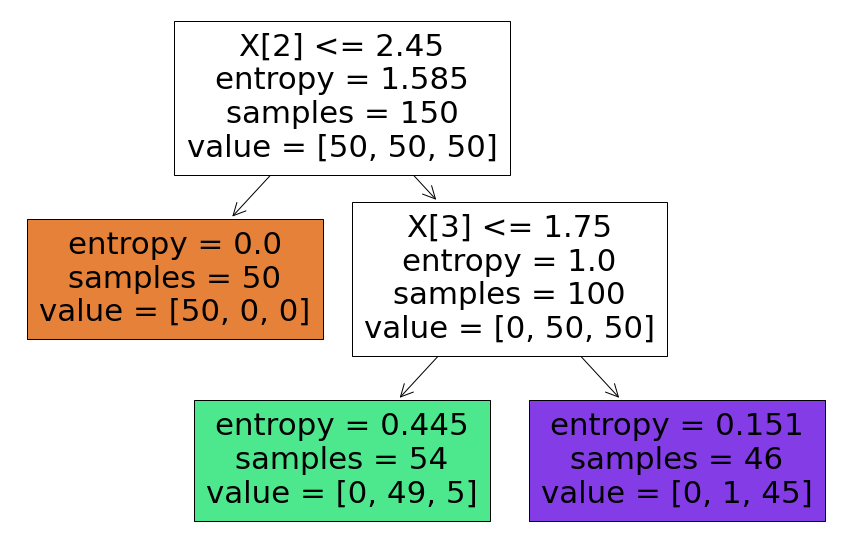

In [73]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

### Inference:

*value = [50,50,50]* in root node indicates 3 catgories. category 1 is 50, category 2 is 50, and category 2 is 50.

When we split this, the node at lhs we get entropy as 0, no of samples are 50 and *value = [50,0,0]*. Since entropy is 0 then that node is a leaf node. So this split is a **pure split**. 

The node at RHS, we get entropy as 1. it is an **impure split**. The *value = [0, 50, 50]*. Number of samples are 100.

## Train and test split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
pd.DataFrame(X_train)

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## Using decision tree classifier for prediction

## Using criterion as gini

In [76]:
classifier1 = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [77]:
classifier1

DecisionTreeClassifier(max_depth=2)

## Fit independent and dependent features into classifier

In [79]:
classifier1.fit(X,y)

DecisionTreeClassifier(max_depth=2)

## Construct a classifier

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

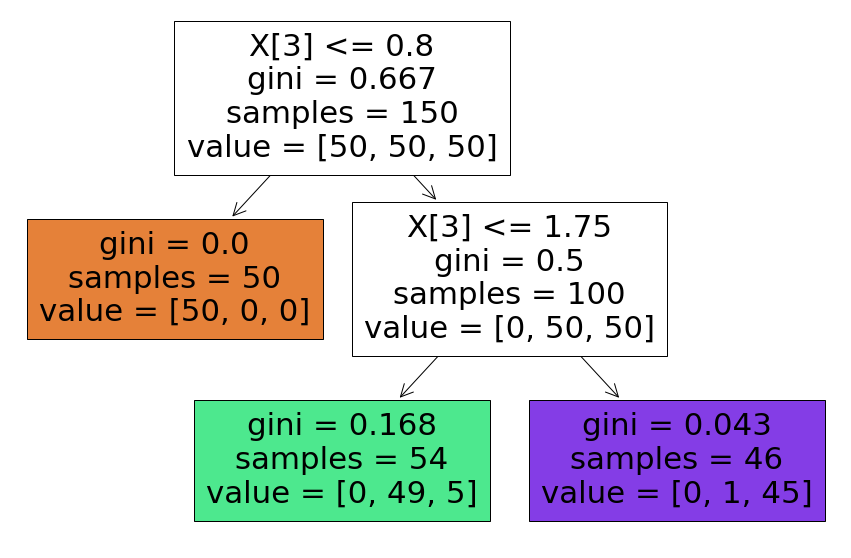

In [80]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier1, filled=True)

## prepruning gridsearch cv and cross val score assignment

In [81]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2]
}
clf = tree.DecisionTreeClassifier()
gridCV = GridSearchCV(estimator=clf, param_grid=parameters)
gridCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

## decision tree regressor